In [1]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import xarray as xr
from scipy.ndimage import gaussian_filter
from matplotlib.cm import get_cmap

In [2]:
# Read the CSV file into a dataframe
era5_df = pd.read_csv('AR_statistics_ERA5.csv')
wrf_df = pd.read_csv('AR_statistics_WRF.csv')
# Display the first few rows of the dataframe to confirm it's loaded correctly
print(era5_df.head())
print(wrf_df.head())

  Ensemble member         Datetime  95th Percentile IVT  99th Percentile IVT  \
0            ERA5  2017-01-06 1200                  544                  610   
1            ERA5  2017-01-06 1500                  615                  700   
2            ERA5  2017-01-06 1800                  661                  794   
3            ERA5  2017-01-06 2100                  724                  897   
4            ERA5  2017-01-07 0000                  736                  877   

   Mean IVT  Standard Deviation  Total IVT  Centroid Lat  Centroid Lon  
0       365                  96     954519         24.26       -140.57  
1       375                 118    1073375         25.59       -138.02  
2       387                 130    1200153         27.50       -135.19  
3       410                 150    1349380         28.16       -134.17  
4       433                 156    1488750         29.01       -132.54  
  Ensemble member         Datetime  95th Percentile IVT  99th Percentile IVT  \
0

In [3]:
# 2. Concatenate the two DataFrames
df = pd.concat([era5_df, wrf_df], ignore_index=True)

In [4]:
print(df)

    Ensemble member         Datetime  95th Percentile IVT  \
0              ERA5  2017-01-06 1200                  544   
1              ERA5  2017-01-06 1500                  615   
2              ERA5  2017-01-06 1800                  661   
3              ERA5  2017-01-06 2100                  724   
4              ERA5  2017-01-07 0000                  736   
..              ...              ...                  ...   
132           p3mom  2017-01-09 0600                  580   
133           p3mom  2017-01-09 0900                  534   
134           p3mom  2017-01-09 1200                  493   
135           p3mom  2017-01-09 1500                  477   
136           p3mom  2017-01-09 1800                  484   

     99th Percentile IVT  Mean IVT  Standard Deviation  Total IVT  \
0                    610       365                  96     954519   
1                    700       375                 118    1073375   
2                    794       387                 130    12

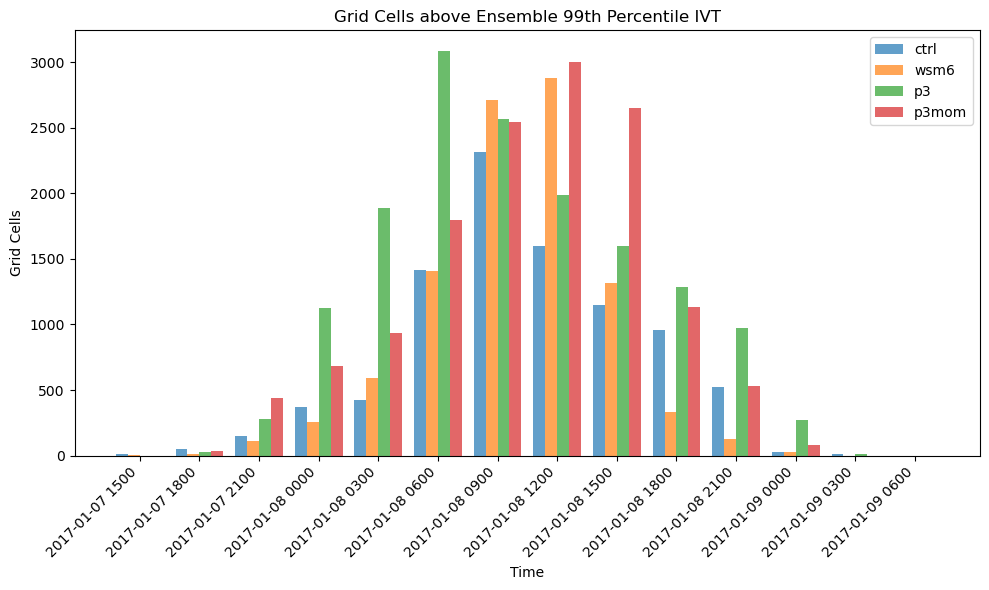

In [5]:
# Assuming you already have the wrf_df defined somewhere above this

# 1. Filter the DataFrame for the desired range
start_time = '2017-01-07 1500'
end_time = '2017-01-09 0600'
filtered_df = wrf_df[(wrf_df['Datetime'] >= start_time) & (wrf_df['Datetime'] <= end_time)]

# Create a bar chart with bars placed side by side for each ensemble member
fig, ax = plt.subplots(figsize=(10, 6))
unique_members = filtered_df['Ensemble member'].unique()
width = 0.2  # Width of each bar

for idx, member in enumerate(unique_members):
    member_data = filtered_df[filtered_df['Ensemble member'] == member]
    x_vals = np.arange(len(member_data)) + (idx * width)
    ax.bar(x_vals, member_data['Grid Cells above 99th'], width=width, label=f'{member}', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('Grid Cells')
ax.set_title('Grid Cells above Ensemble 99th Percentile IVT')
ax.set_xticks(np.arange(len(member_data)) + ((len(unique_members) - 1) * width) / 2)
ax.set_xticklabels(member_data['Datetime'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

47951
9075
9793
15205
13878


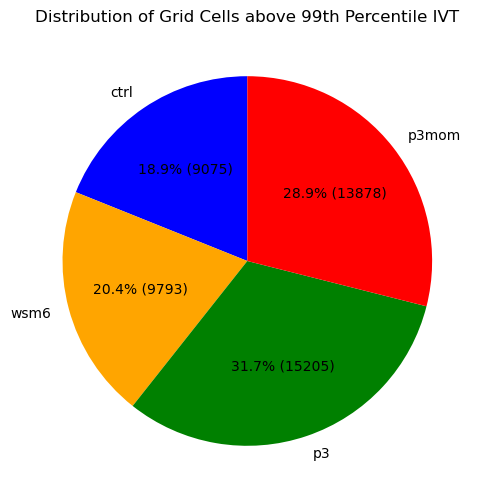

In [6]:
total = wrf_df["Grid Cells above 99th"].sum()
print(total)

total_ctrl = wrf_df[wrf_df["Ensemble member"] == "ctrl"]["Grid Cells above 99th"].sum()
print(total_ctrl)
total_wsm6 = wrf_df[wrf_df["Ensemble member"] == "wsm6"]["Grid Cells above 99th"].sum()
print(total_wsm6)
total_p3 = wrf_df[wrf_df["Ensemble member"] == "p3"]["Grid Cells above 99th"].sum()
print(total_p3)
total_p3mom = wrf_df[wrf_df["Ensemble member"] == "p3mom"]["Grid Cells above 99th"].sum()
print(total_p3mom)

# Values for the pie chart
values = [total_ctrl, total_wsm6, total_p3, total_p3mom]
labels = ["ctrl", "wsm6", "p3", "p3mom"]
colors = ['blue', 'orange', 'green', 'red']

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(values, labels=labels, colors=colors, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p*total/100), startangle=90)
plt.title('Distribution of Grid Cells above 99th Percentile IVT')
plt.show()

In [7]:

area = (15205 * 9000) / 1000
print(area/9)
#np.sqrt(136845)

15205.0


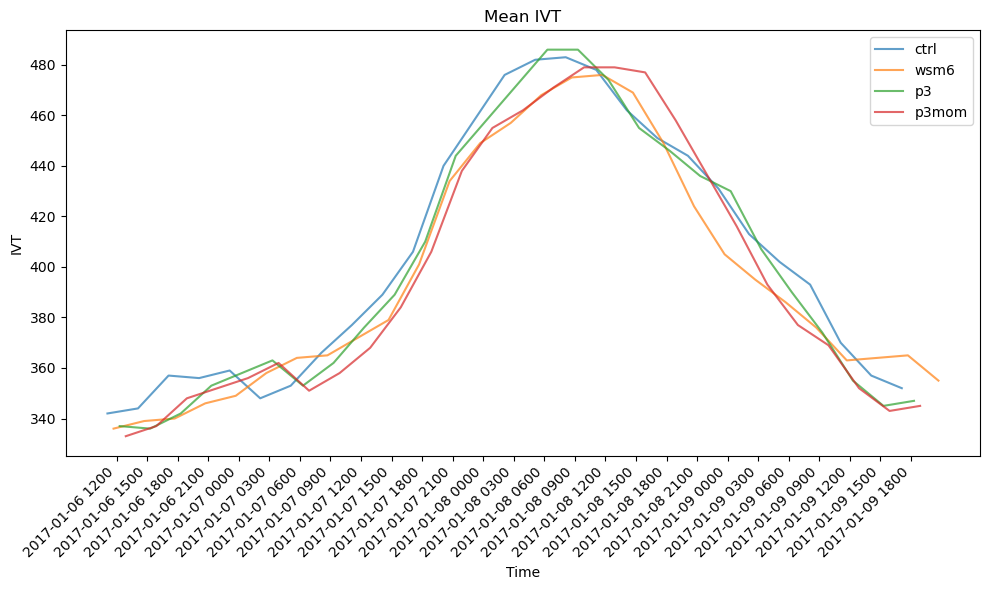

In [29]:
# Create a bar chart with bars placed side by side for each ensemble member
fig, ax = plt.subplots(figsize=(10, 6))
unique_members = wrf_df['Ensemble member'].unique()
width = 0.2  # Width of each bar

for idx, member in enumerate(unique_members):
    member_data = wrf_df[wrf_df['Ensemble member'] == member]
    x_vals = np.arange(len(member_data)) + (idx * width)
    ax.plot(x_vals, member_data['Mean IVT'], label=f'{member}', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('IVT')
ax.set_title('Mean IVT')
ax.set_xticks(np.arange(len(member_data)) + ((len(unique_members) - 1) * width) / 2)
ax.set_xticklabels(member_data['Datetime'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

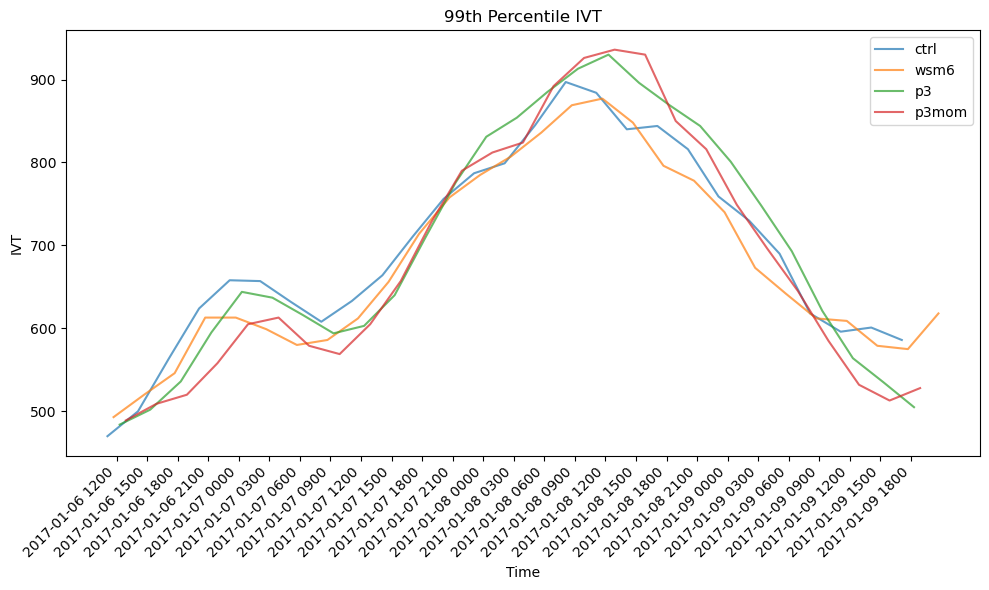

In [28]:
# Create a bar chart with bars placed side by side for each ensemble member
fig, ax = plt.subplots(figsize=(10, 6))
unique_members = wrf_df['Ensemble member'].unique()
width = 0.2  # Width of each bar

for idx, member in enumerate(unique_members):
    member_data = wrf_df[wrf_df['Ensemble member'] == member]
    x_vals = np.arange(len(member_data)) + (idx * width)
    ax.plot(x_vals, member_data['99th Percentile IVT'], label=f'{member}', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('IVT')
ax.set_title('99th Percentile IVT')
ax.set_xticks(np.arange(len(member_data)) + ((len(unique_members) - 1) * width) / 2)
ax.set_xticklabels(member_data['Datetime'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

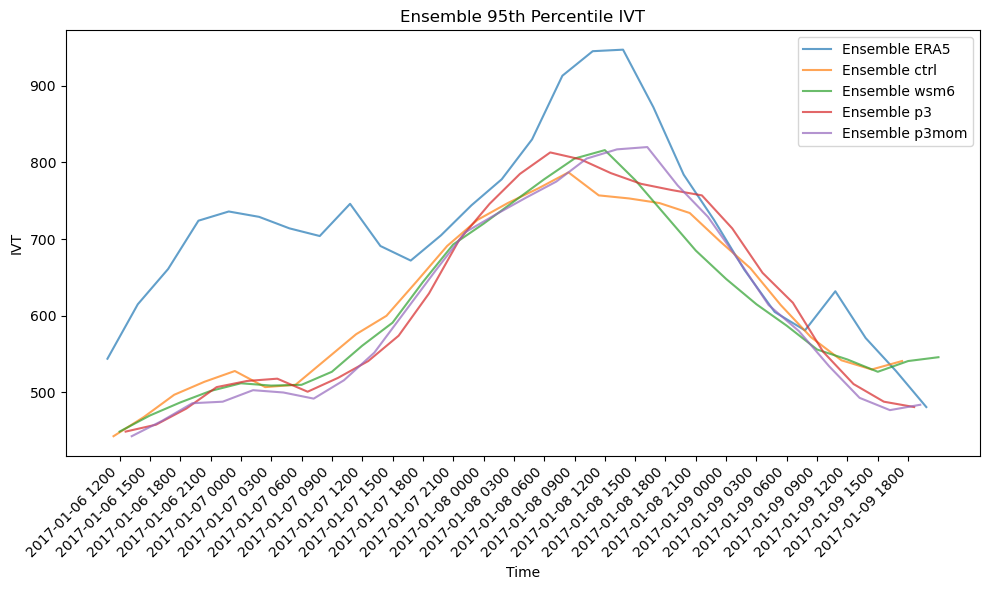

In [10]:
# Create a bar chart with bars placed side by side for each ensemble member
fig, ax = plt.subplots(figsize=(10, 6))
unique_members = df['Ensemble member'].unique()
width = 0.2  # Width of each bar

for idx, member in enumerate(unique_members):
    member_data = df[df['Ensemble member'] == member]
    x_vals = np.arange(len(member_data)) + (idx * width)
    ax.plot(x_vals, member_data['95th Percentile IVT'], label=f'Ensemble {member}', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('IVT')
ax.set_title('Ensemble 95th Percentile IVT')
ax.set_xticks(np.arange(len(member_data)) + ((len(unique_members) - 1) * width) / 2)
ax.set_xticklabels(member_data['Datetime'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

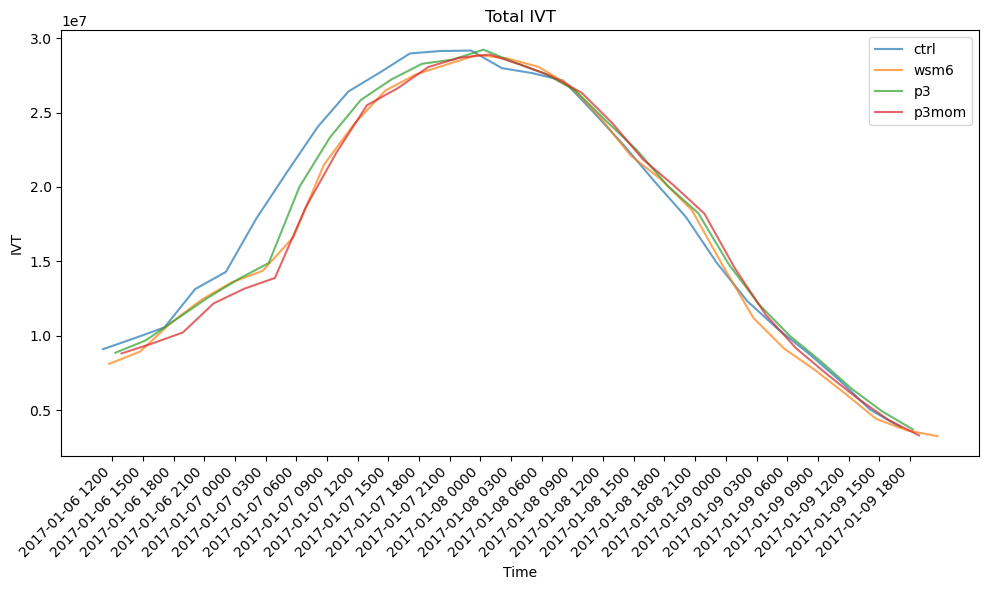

In [27]:
# Create a bar chart with bars placed side by side for each ensemble member
fig, ax = plt.subplots(figsize=(10, 6))
unique_members = wrf_df['Ensemble member'].unique()
width = 0.2  # Width of each bar

for idx, member in enumerate(unique_members):
    member_data = wrf_df[wrf_df['Ensemble member'] == member]
    x_vals = np.arange(len(member_data)) + (idx * width)
    ax.plot(x_vals, member_data['Total IVT'], label=f'{member}', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('IVT')
ax.set_title('Total IVT')
ax.set_xticks(np.arange(len(member_data)) + ((len(unique_members) - 1) * width) / 2)
ax.set_xticklabels(member_data['Datetime'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

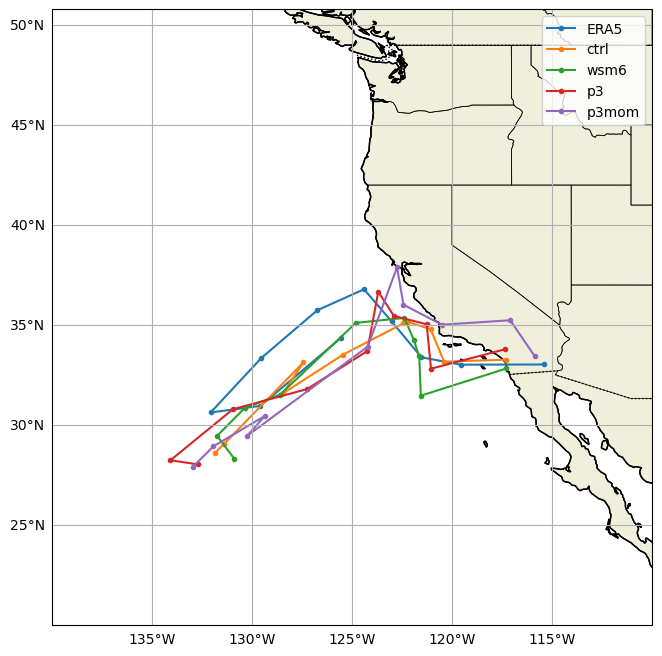

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Set up the map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_extent([-140, -110, 20, 50])  # Set the extent to view the US; adjust as needed

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False   # suppress top grid labels
gl.right_labels=False # suppress right grid labels
# Iterate over each unique ensemble member and plot
for member in df['Ensemble member'].unique():
    member_df = df[df['Ensemble member'] == member]
    member_df_third = member_df.iloc[8::2]
    ax.plot(member_df_third['Centroid Lon'], member_df_third['Centroid Lat'], marker='.', label=member, transform=ccrs.PlateCarree())

ax.legend()
plt.show()

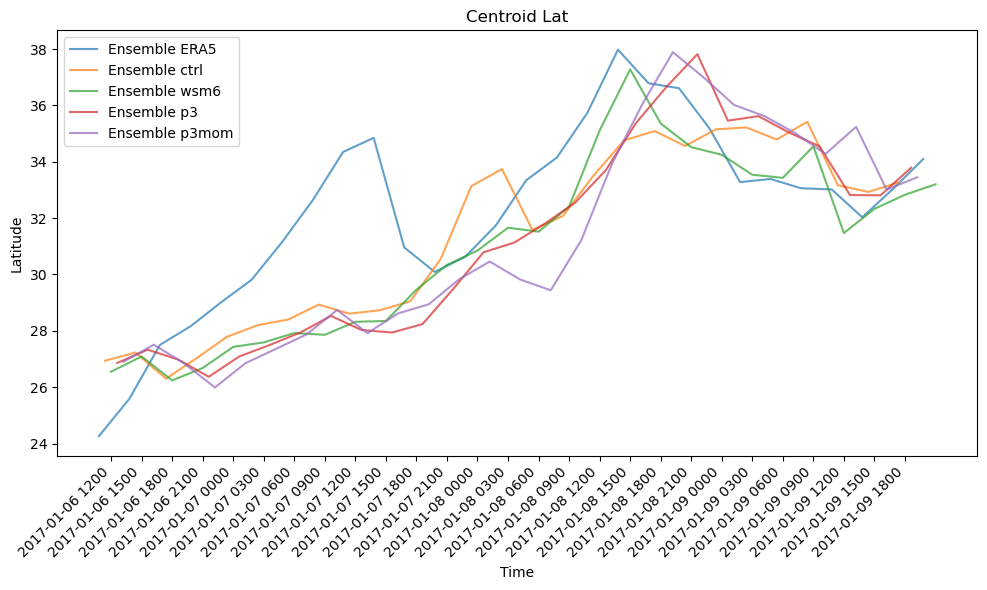

In [13]:
# Create a bar chart with bars placed side by side for each ensemble member
fig, ax = plt.subplots(figsize=(10, 6))
unique_members = df['Ensemble member'].unique()
width = 0.2  # Width of each bar

for idx, member in enumerate(unique_members):
    member_data = df[df['Ensemble member'] == member]
    x_vals = np.arange(len(member_data)) + (idx * width)
    ax.plot(x_vals, member_data['Centroid Lat'], label=f'Ensemble {member}', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('Latitude')
ax.set_title('Centroid Lat')
ax.set_xticks(np.arange(len(member_data)) + ((len(unique_members) - 1) * width) / 2)
ax.set_xticklabels(member_data['Datetime'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

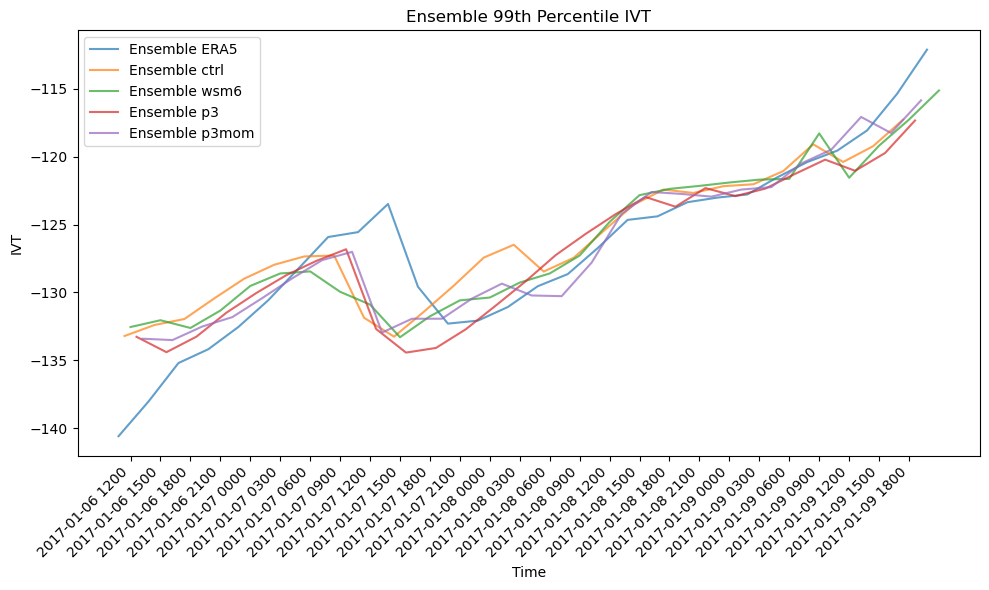

In [14]:
# Create a bar chart with bars placed side by side for each ensemble member
fig, ax = plt.subplots(figsize=(10, 6))
unique_members = df['Ensemble member'].unique()
width = 0.2  # Width of each bar

for idx, member in enumerate(unique_members):
    member_data = df[df['Ensemble member'] == member]
    x_vals = np.arange(len(member_data)) + (idx * width)
    ax.plot(x_vals, member_data['Centroid Lon'], label=f'Ensemble {member}', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('IVT')
ax.set_title('Ensemble 99th Percentile IVT')
ax.set_xticks(np.arange(len(member_data)) + ((len(unique_members) - 1) * width) / 2)
ax.set_xticklabels(member_data['Datetime'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

0      610
1      700
2      794
3      897
4      877
5      877
6      874
7      821
8      836
9      775
10     743
11     801
12     869
13     910
14     956
15    1026
16    1062
17    1037
18     983
19     933
20     829
21     760
22     703
23     646
24     672
25     638
26     575
27     500
Name: 99th Percentile IVT, dtype: int64
28     470
29     500
30     563
31     624
32     658
      ... 
132    645
133    585
134    532
135    513
136    528
Name: 99th Percentile IVT, Length: 109, dtype: int64
nan


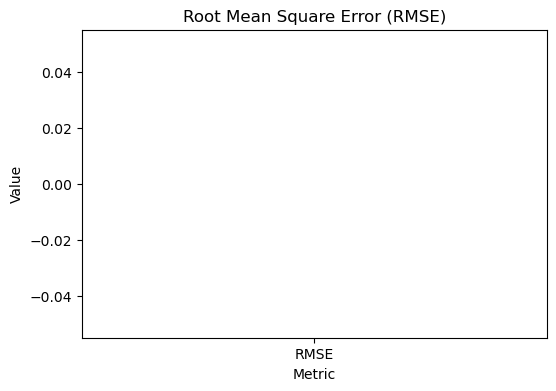

RMSE: nan


In [15]:

# Split data into truth (ERA5) and predicted (other ensemble members)
truth_data = df[df['Ensemble member'] == 'ERA5']
predicted_data = df[df['Ensemble member'] != 'ERA5']
print(truth_data['99th Percentile IVT'])
print(predicted_data['99th Percentile IVT'])
# Calculate RMSE manually
rmse = np.sqrt(((predicted_data['99th Percentile IVT'] - truth_data['99th Percentile IVT']) ** 2).mean())
print(rmse)
# Plot RMSE
plt.figure(figsize=(6, 4))
plt.bar(['RMSE'], [rmse], color='blue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Root Mean Square Error (RMSE)')
plt.show()

print(f'RMSE: {rmse}')